In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from collections import defaultdict
import itertools
import copy

Note that I've made these racetracks up pretty much to resemble the tracks in the book. 

In [2]:
racetrack_one = np.array([
    [-1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [-1, -1,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [-1, -1,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [-1,  0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [ 0,  0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [ 0,  0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1],
    [ 0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ 0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  -1,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  -1,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  -1,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  -1,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  -1,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  -1,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  -1,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  -1,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  -1,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  -1,  -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  -1,  -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  -1,  -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  -1,  -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  -1,  -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  -1,  -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  -1,  -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  -1,  -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  -1,  -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1],
    [ -1,  -1,  -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1]], dtype=np.int16)


racetrack_two = np.array([
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2],
    [-1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2],
    [-1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2],
    [-1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1,  -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  -1,  -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1,  -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1,  -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1,  -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1,  -1,  -1,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1,  -1,  -1,  -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1,  -1,  -1,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1,  -1,  -1,  -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1,  -1,  -1,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1,  -1,  -1,  -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1,  -1,  -1,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1,  -1,  -1,  -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1,  -1,   0,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1,  -1,  -1,  -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1,   0,   0,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1,  -1,  -1,  -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, 0,   0,   0,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1,  -1,  -1,  -1],
    [-1, -1, -1, -1, -1, -1, -1, 0, 0,   0,   0,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1,  -1,  -1,  -1],
    [-1, -1, -1, -1, -1, -1, 0, 0, 0,   0,   0,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1,  -1,  -1,  -1],
    [-1, -1, -1, -1, -1, 0, 0, 0, 0,   0,   0,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1,  -1,  -1,  -1],
    [-1, -1, -1, -1, 0, 0, 0, 0, 0,   0,   0,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1,  -1,  -1,  -1],
    [-1, -1, -1, 0, 0, 0, 0, 0, 0,   0,   0,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1,  -1,  -1,  -1],
    [-1, -1, 0, 0, 0, 0, 0, 0, 0,   0,   0,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1,  -1,  -1,  -1],
    [-1, 0, 0, 0, 0, 0, 0, 0, 0,   0,   0,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1,  -1,  -1,  -1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0,   0,   0,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1,  -1,  -1,  -1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0,   0,   0,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1,  -1,  -1,  -1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0,   0,   0,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1,  -1,  -1,  -1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0,   0,   0,  0,  0,  0,  0,  0,  0,  0,  -1,  -1,  -1,  -1,  -1,  -1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1,   1,   1,  1,  1,  1,  1,  1,  1,  1,  -1,  -1,  -1,  -1,  -1,  -1]
    ], dtype=np.int16)

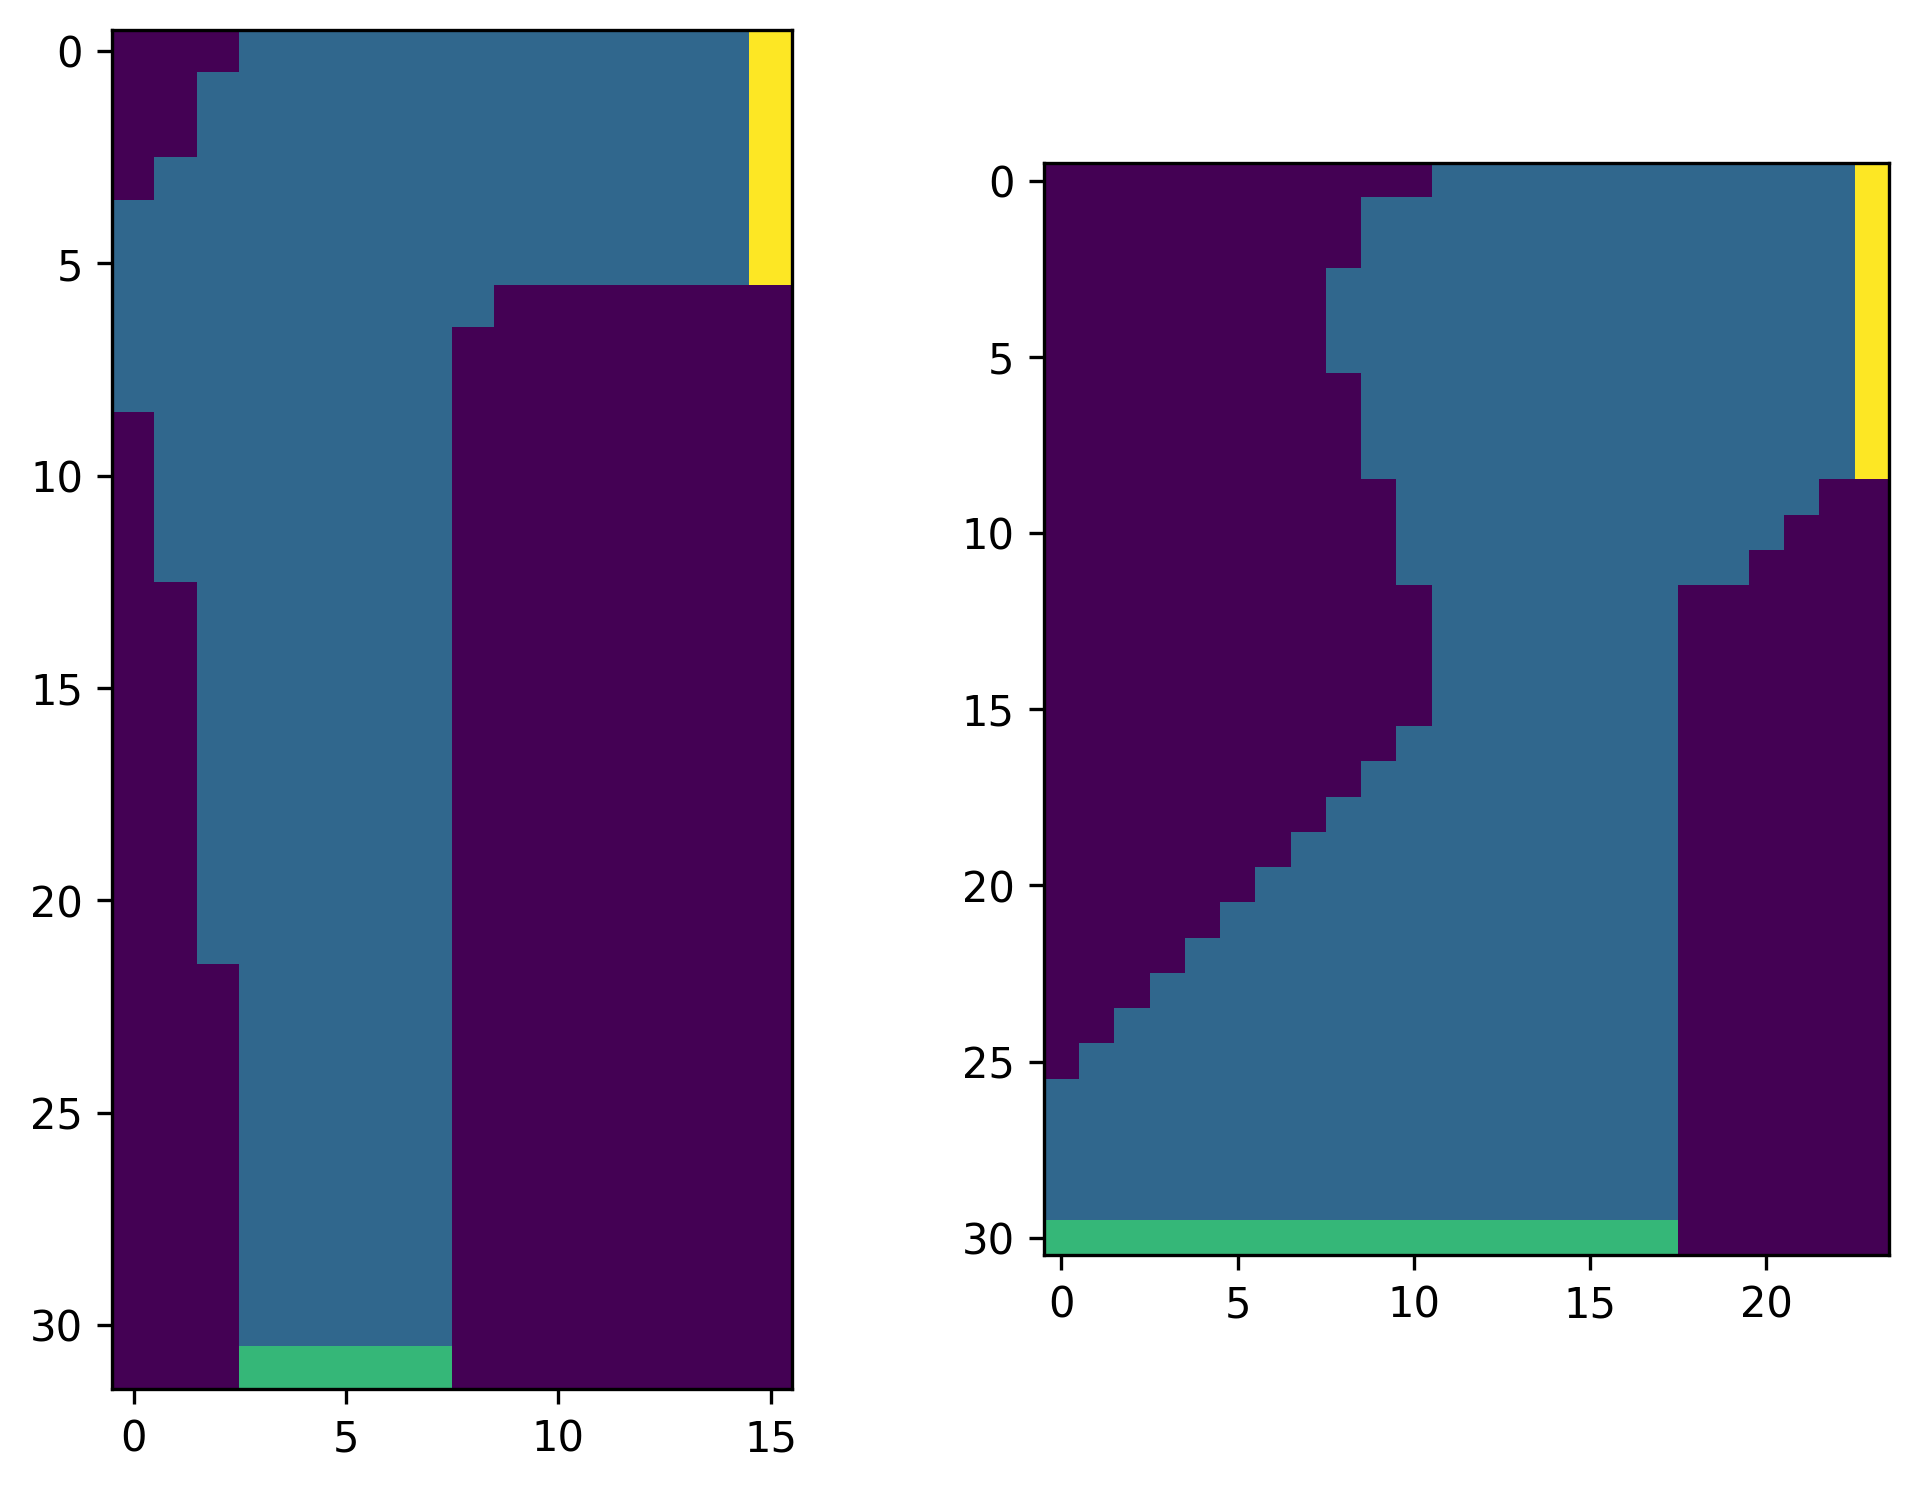

In [3]:
plt.figure(figsize=(8, 6), dpi=300)
plt.subplot(121)
plt.imshow(racetrack_one)

plt.subplot(122)
plt.imshow(racetrack_two);

In [128]:
def sample_dynamics(s, a, racetrack, p_noise=0.0):
    # state is [x, y, x_vel, y_vel]
    # action is [x_inc, y_inc]
    # this function will allow stupid actions and then ignore them. this makes the other code slightly easier. \
    coin_flip = np.random.binomial(n=1, p=p_noise)
    s_new = copy.deepcopy(s)
    
    # first update velocities
    if not coin_flip:
        # apply increment
        s_new = s_new + np.array([0, 0, a[0], a[1]])
        # clip velocities
        s_new = np.clip(s_new, a_min=[0, 0, 0, 0], a_max=[racetrack.shape[1], racetrack.shape[0], 5, 5])
    
    # apply_velocities
    s_new = s_new + np.array([s_new[2], -s_new[3], 0, 0])
    if s_new[0] < 0 or s_new[0]>(racetrack.shape[1]-1) or \
        s_new[1] < 0 or s_new[1]>(racetrack.shape[0]-1):
        return generate_valid_init_state(racetrack), -100, False
    
    if racetrack[s_new[1], s_new[0]] == -1:
        #print("reset - intersect")
        return generate_valid_init_state(racetrack), -100, False
    
    if racetrack[s_new[1], s_new[0]] == 2:
        #print("hiut start, end")
        return s_new, 0, True
    
    return s_new, -1, False


def get_state_indx(all_states, state):
    return np.nonzero(np.all(all_states==state, axis=1))[0][0]

def generate_valid_init_state(racetrack):
    x_start = np.random.choice(np.nonzero(racetrack[-1, :] == 1)[0])
    s_new = np.array([x_start, racetrack.shape[0]-1, 0, 0])
    return s_new

def generate_all_valid_init_state(racetrack):
    x_all = np.nonzero(racetrack[-1, :] == 1)[0]
    y = racetrack.shape[0]-1
    return [(x, y) for x in x_all]

def generate_soft_episode(eps, s_0, q_table, racetrack, dynamics, all_actions, all_states, T_max=50):
    if s_0 is  None:
        s = generate_valid_init_state(racetrack)
    else:
        s = copy.deepcopy(s_0)
        
    n_actions = all_actions.shape[0]
    
    episode = []
    episode_terminated = False
    
    t = 0
    
    while not episode_terminated:
        t += 1
        s_indx = get_state_indx(all_states, s)
        coin_flip = np.random.binomial(n=1, p=eps)
        
        a_max = np.argmax(q_table[s_indx, :])
        if coin_flip:
            a_indx = np.random.choice(np.arange(n_actions))
            b = (1 - eps) + eps/n_actions if a_indx == a_max else eps/n_actions
        else:
            a_indx = a_max
            b = (1 - eps) + eps/n_actions
            
        a = all_actions[a_indx]
        s, R, episode_terminated = dynamics(s, a, racetrack)
        if t > T_max:
            episode.append((s_indx, a_indx, -100, b))
            break
        else:
            episode.append((s_indx, a_indx, R, b))
    
    episode.reverse()
    return episode
        
def off_policy_mc_control(dynamics, racetrack, N_episodes=25, gamma=1, eps_init=0.5):
    # initialise policies
    all_states = np.array(list(itertools.product(list(range(racetrack.shape[1])), list(range(racetrack.shape[0])), list(range(6)), list(range(6)))))
    all_actions = np.array(list(itertools.product(list(range(-1, 2)), list(range(-1, 2)))))
    n_states = all_states.shape[0]
    n_actions = all_actions.shape[0]

    # all zeros
    # pessimistic initialisation required
    Q_table = np.random.normal(loc=-1250, size=(n_states, n_actions))
    C_table = np.zeros(shape=(n_states, n_actions))
    pi_table = np.argmax(Q_table, axis=1)    
    eps = eps_init
    
    # kinda a cheat, but let's use exploring starts (almost)
    valid_initial_states = generate_all_valid_init_state(racetrack)
    
    for eps_indx in range(N_episodes):
        # b is an uniform policy over all actions. 
        G = 0
        W = 1
        
        if eps_indx % 250 == 0:
            R_gred = []
            for valid_init_state in valid_initial_states:
                _, R_gred_i = generate_episode_pi([valid_init_state[0], valid_init_state[1], 0, 0], racetrack, sample_dynamics, all_actions, all_states, pi_table)
                R_gred.append(R_gred_i)
            
            # the more negative the greedy score, the more likely we want to be to choose it!
            init_state_pmf = -np.array(R_gred)
            init_state_pmf = np.exp(init_state_pmf) / np.sum(np.exp(init_state_pmf))
            
            print(f"After {eps_indx} episodes, Greedy Episode Return {R_gred}")
            # print(f"pmf is {init_state_pmf}")
        
        # if we get a good enough reward!
        # fully explore until we find a reasonable greedy policy
        # after this point, epsilon greedy around it to learn what is good.
        if np.min(R_gred) > -25:
            eps = 0.1
        
        init_state_indx = np.random.choice(np.arange(init_state_pmf.size), p = init_state_pmf)
        s_0 = np.array([valid_initial_states[init_state_indx][0], valid_initial_states[init_state_indx][1], 0, 0])
        for i, (s_t_indx, a_t_indx, r_t1, b) in enumerate(generate_soft_episode(eps, s_0, Q_table, racetrack, dynamics, all_actions, all_states)):
            G = gamma*G + r_t1
            C_table[s_t_indx, a_t_indx] += W
            C = C_table[s_t_indx, a_t_indx]
            Q_table[s_t_indx, a_t_indx] += (W/C) * (G - Q_table[s_t_indx, a_t_indx])
            old_a = pi_table[s_t_indx]
            pi_table[s_t_indx] = np.argmax(Q_table[s_t_indx, :])
                    
            if a_t_indx !=  pi_table[s_t_indx]:
                break
            else:
                W = W / b
    
    return pi_table, all_states, all_actions, Q_table


def generate_episode_pi(s, racetrack, dynamics, all_actions, all_states, pi, T_max=50):
    n_actions = all_actions.shape[0]
    episode = [np.array([s[0], s[1]])]
    episode_terminated = False
    R_total = 0
    t=0
    while not episode_terminated:
        if t>T_max:
            R_total += -100
            break
            
        s_indx = get_state_indx(all_states, s)
        a_indx = pi[s_indx]
        a = all_actions[a_indx]
        s, R, episode_terminated = dynamics(s, a, racetrack)
        R_total += R
        episode.append(np.array([s[0], s[1]]))
        t+=1
    
    return episode, R_total

In [129]:
pi_table, all_states, all_actions, Q_table =  off_policy_mc_control(sample_dynamics, racetrack_one, N_episodes=5000)

After 0 episodes, Greedy Episode Return [-448, -151, -151, -151, -250]
After 250 episodes, Greedy Episode Return [-20, -151, -151, -151, -151]
After 500 episodes, Greedy Episode Return [-15, -218, -250, -151, -151]
After 750 episodes, Greedy Episode Return [-15, -19, -250, -151, -151]
After 1000 episodes, Greedy Episode Return [-14, -19, -151, -151, -151]
After 1250 episodes, Greedy Episode Return [-14, -14, -13, -151, -15]
After 1500 episodes, Greedy Episode Return [-14, -14, -13, -151, -117]
After 1750 episodes, Greedy Episode Return [-14, -126, -13, -15, -14]
After 2000 episodes, Greedy Episode Return [-14, -13, -12, -14, -13]
After 2250 episodes, Greedy Episode Return [-15, -13, -13, -15, -14]
After 2500 episodes, Greedy Episode Return [-15, -13, -12, -14, -13]
After 2750 episodes, Greedy Episode Return [-14, -13, -12, -14, -13]
After 3000 episodes, Greedy Episode Return [-14, -12, -13, -15, -14]
After 3250 episodes, Greedy Episode Return [-14, -12, -12, -14, -13]
After 3500 episod

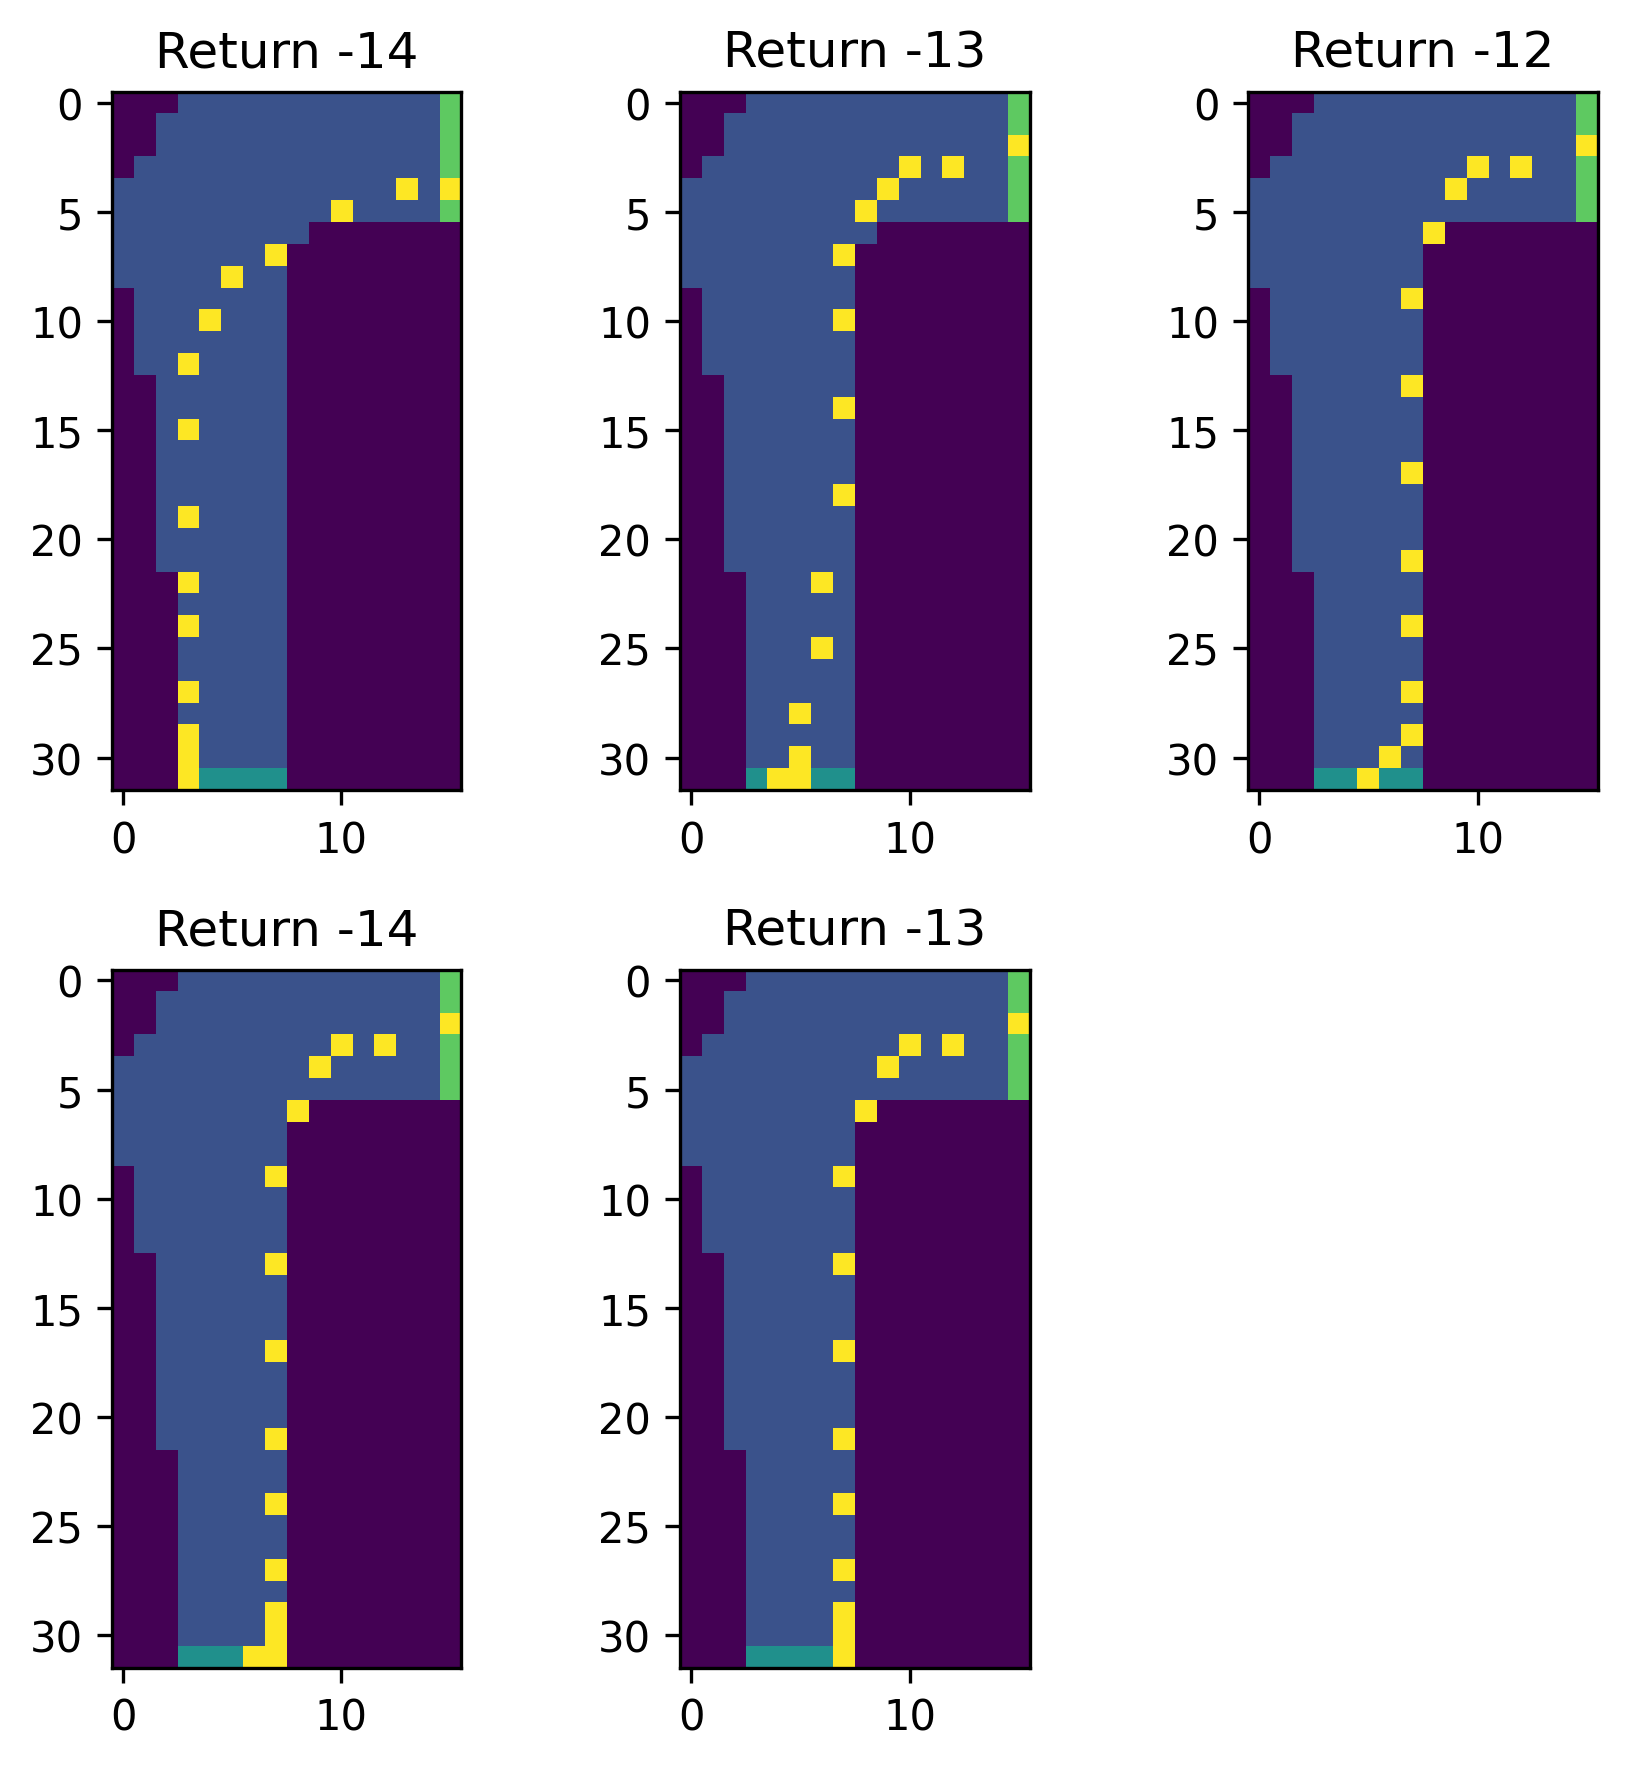

In [130]:
valid_init_states = generate_all_valid_init_state(racetrack_one)
N_init = len(valid_init_states)
N_per_row = 3
N_rows = int(np.round(N_init / N_per_row))

plt.figure(figsize=(6, 6), dpi=300)

for ind, s in enumerate(valid_init_states):
    plt.subplot(N_rows, N_per_row, ind+1)
    ep, R = generate_episode_pi([s[0], s[1], 0, 0], racetrack_one, lambda a, b, c: sample_dynamics(a, b, c, 0), all_actions, all_states, pi_table, T_max=50)
    racetrack_traj = copy.deepcopy(racetrack_one)
    for s_traj in ep:
        racetrack_traj[s_traj[1], s_traj[0]] = 3
    plt.imshow(racetrack_traj)
    plt.title(f"Return {R}")
    
plt.tight_layout()
plt.savefig("one.pdf")

In [132]:
pi_table, all_states, all_actions, Q_table =  off_policy_mc_control(sample_dynamics, racetrack_two, N_episodes=5000, eps_init=1)

After 0 episodes, Greedy Episode Return [-448, -151, -151, -151, -349, -151, -151, -151, -547, -250, -151, -151, -250, -151, -151, -151, -250, -349]
After 250 episodes, Greedy Episode Return [-151, -151, -14, -10, -12, -9, -10, -8, -7, -151, -151, -151, -19, -17, -151, -116, -151, -151]
After 500 episodes, Greedy Episode Return [-151, -16, -14, -8, -12, -8, -8, -151, -7, -151, -20, -8, -19, -17, -151, -151, -151, -151]
After 750 episodes, Greedy Episode Return [-9, -12, -14, -8, -11, -8, -8, -151, -7, -151, -14, -8, -19, -17, -151, -151, -151, -151]
After 1000 episodes, Greedy Episode Return [-9, -12, -14, -8, -11, -8, -8, -151, -7, -151, -9, -10, -11, -9, -151, -151, -151, -151]
After 1250 episodes, Greedy Episode Return [-9, -12, -14, -8, -11, -8, -8, -151, -7, -17, -9, -10, -11, -9, -151, -151, -151, -151]
After 1500 episodes, Greedy Episode Return [-9, -12, -14, -8, -11, -8, -8, -151, -7, -16, -9, -10, -11, -8, -7, -151, -151, -151]
After 1750 episodes, Greedy Episode Return [-8, -

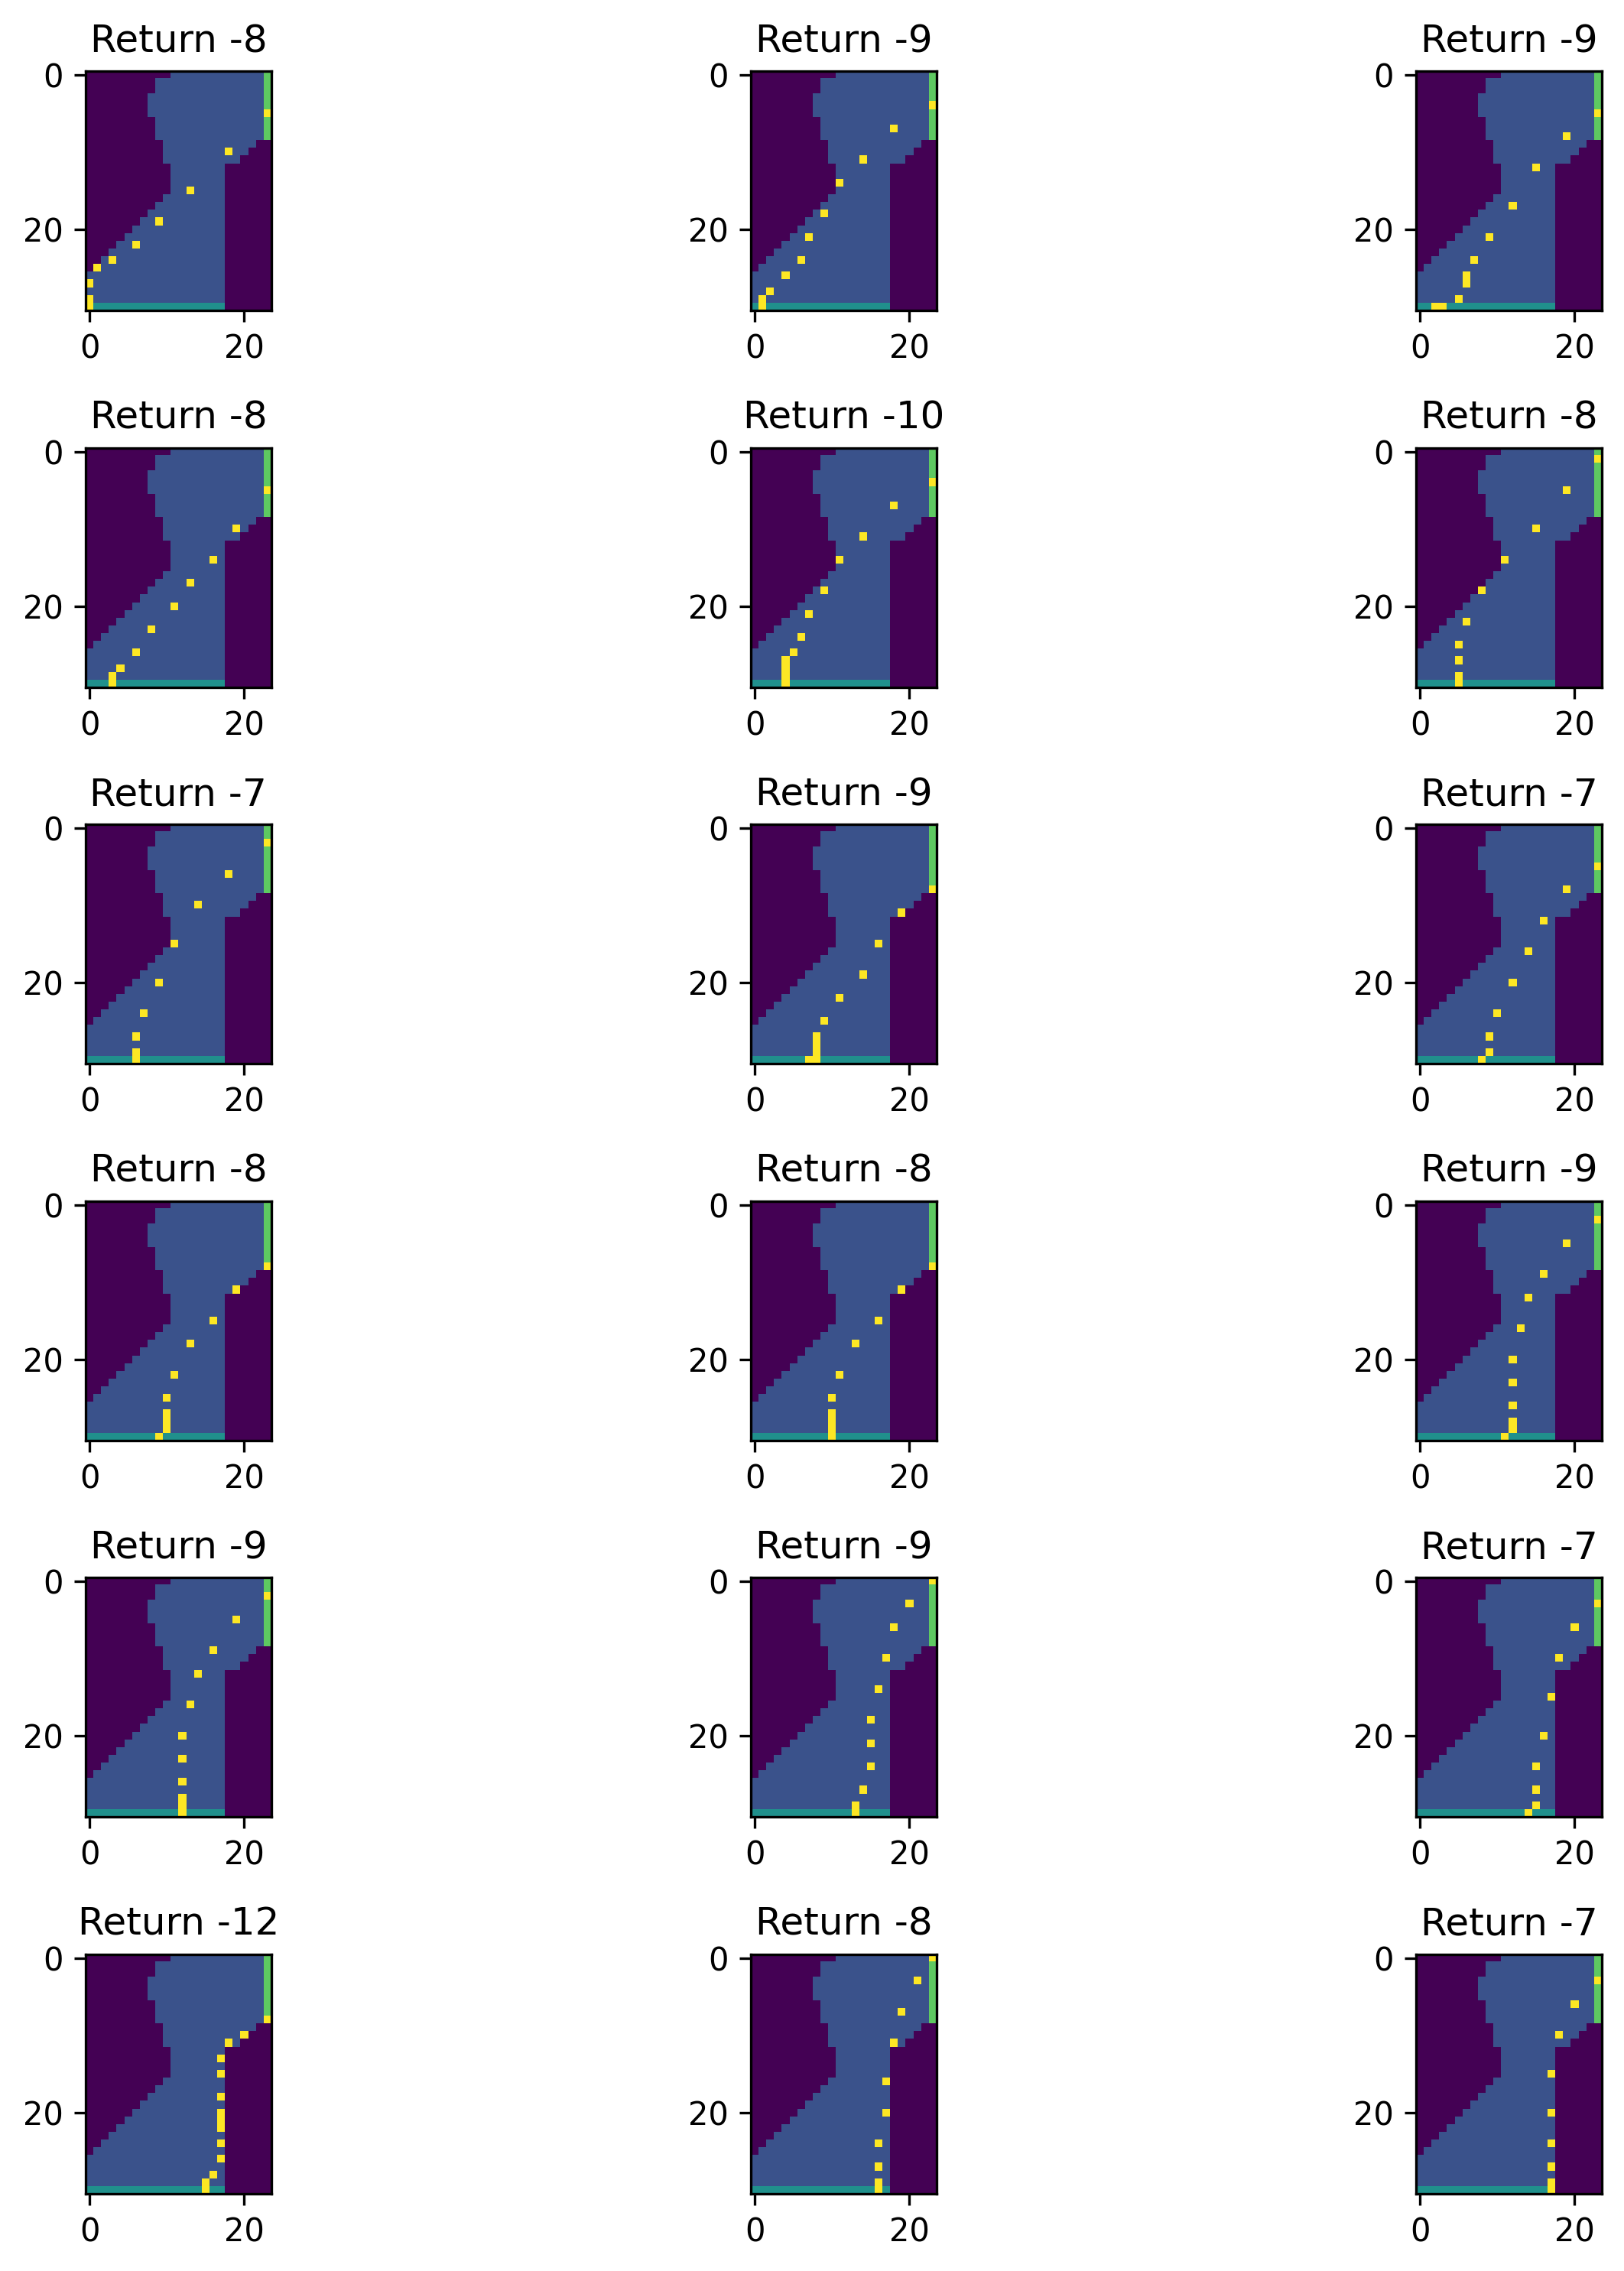

In [138]:
valid_init_states = generate_all_valid_init_state(racetrack_two)
N_init = len(valid_init_states)
N_per_row = 3
N_rows = int(np.round(N_init / N_per_row))

plt.figure(figsize=(10, 10), dpi=300)

for ind, s in enumerate(valid_init_states):
    plt.subplot(N_rows, N_per_row, ind+1)
    ep, R = generate_episode_pi([s[0], s[1], 0, 0], racetrack_two, lambda a, b, c: sample_dynamics(a, b, c, 0), all_actions, all_states, pi_table, T_max=50)
    racetrack_traj = copy.deepcopy(racetrack_two)
    for s_traj in ep:
        racetrack_traj[s_traj[1], s_traj[0]] = 3
    plt.imshow(racetrack_traj)
    plt.title(f"Return {R}")
    
plt.tight_layout()
plt.savefig("two.pdf")

# What a mess!

It kinda works, though it takes huge amounts of episodes. Its hard to choose epsilon - if its too large, we explore loads but update our policy little. if its small, we have the opposite problem. In general I found we needed large epsilon for this problem. 

i had to make changes to get this to actually work. I think I've learn that Monte Carlo is basically super super slow. Main issue is this only learning from the tails of activities - we ignore inconsistent policies. 